# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Check in your data file along with this exercise. Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [22]:

import pandas as pd

# Load the dataset
file_path = 'Health_Trends_Data.csv'  # Update with the actual file path
data = pd.read_csv(file_path)
import pandas as pd

# Load the dataset
file_path = 'Health_Trends_Data.csv'  # Update with the actual file path
data = pd.read_csv(file_path)

# Get the number of rows and columns
rows, columns = data.shape
print(f"The dataset has {rows}")

The dataset has 1500


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [23]:
import pandas as pd

# Load the dataset
file_path = 'Health_Trends_Data.csv'  # Update with the actual file path
data = pd.read_csv(file_path)

# Count unique values in each column
unique_values = data.nunique()

# Sort to identify the column with the most unique values
most_diverse_column = unique_values.sort_values(ascending=False).index[0]

# Handle unique identifier logic - get the second most diverse column
if unique_values[most_diverse_column] == data.shape[0]:  # Check if it's likely a unique identifier
    next_most_diverse_column = unique_values.sort_values(ascending=False).index[1]
else:
    next_most_diverse_column = most_diverse_column

# Print results
print("Unique values per column:")
print(unique_values)
print(f"\nColumn with the most unique values: {most_diverse_column}")
print(f"Column with the next most unique values: {next_most_diverse_column}")


Unique values per column:
Record_ID               1500
Patient_ID               783
Age                       72
Gender                     3
BMI                      216
Smoking_Status             3
Exercise_Frequency         4
Primary_Diagnosis          4
Environmental_Factor       4
Region                     3
Year                       9
dtype: int64

Column with the most unique values: Record_ID
Column with the next most unique values: Patient_ID


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [24]:
import pandas as pd

# Load the dataset
file_path = 'Health_Trends_Data.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# Identify columns where all values are the same
constant_columns = [col for col in data.columns if data[col].nunique() == 1]

# Print the result
if constant_columns:
    print("Columns with the same value for every row:")
    print(constant_columns)
else:
    print("No columns have the same value for every row.")


No columns have the same value for every row.


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

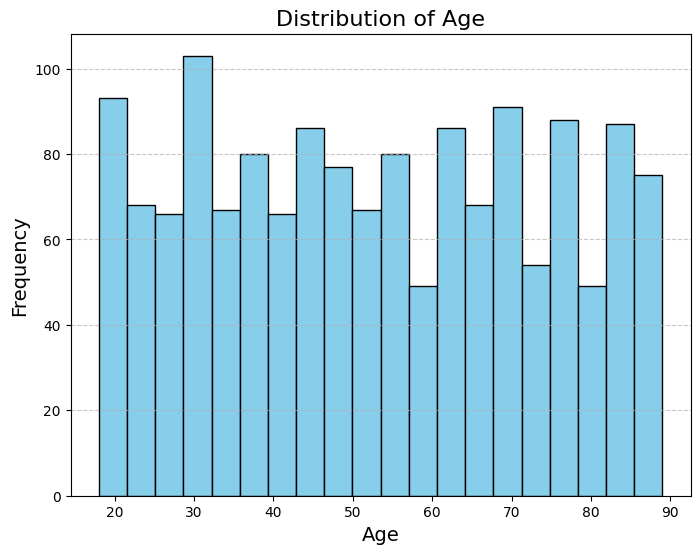

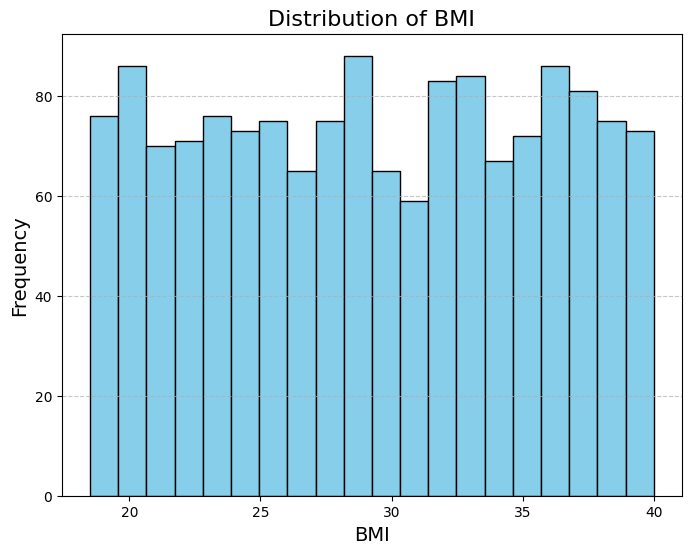

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Health_Trends_Data.csv'
data = pd.read_csv(file_path)

# Create histograms for Age and BMI
numeric_columns = ['Age', 'BMI']

for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(data[column].dropna(), bins=20, edgecolor='black', color='skyblue')
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

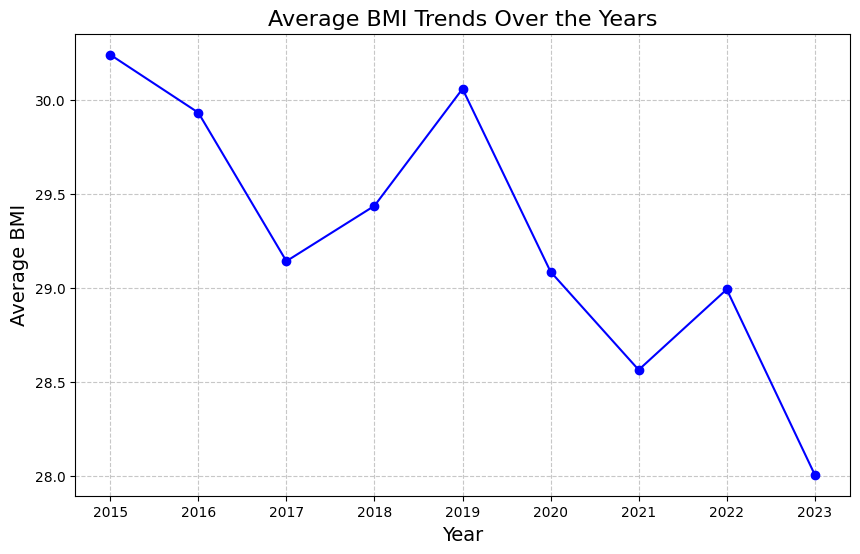

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Health_Trends_Data.csv'
data = pd.read_csv(file_path)

# Calculate the average BMI by Year
bmi_trends = data.groupby('Year')['BMI'].mean().reset_index()

# Create a line chart for BMI trends over the years
plt.figure(figsize=(10, 6))
plt.plot(bmi_trends['Year'], bmi_trends['BMI'], marker='o', linestyle='-', color='blue')
plt.title('Average BMI Trends Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average BMI', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.show()


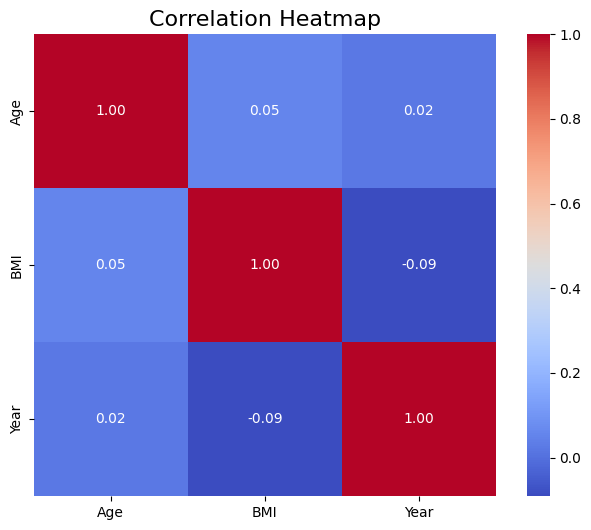

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Health_Trends_Data.csv'
data = pd.read_csv(file_path)

# Select numeric columns for correlation analysis
numeric_data = data[['Age', 'BMI', 'Year']]

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


<ipython-input-28-74585f19ee11>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Gender', y='BMI', palette='Set3')


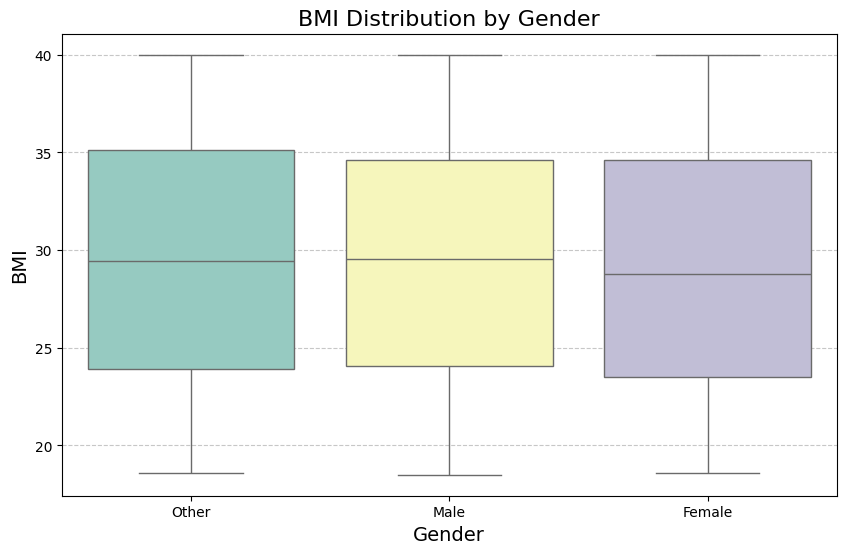

<ipython-input-28-74585f19ee11>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Exercise_Frequency', y='BMI', palette='coolwarm')


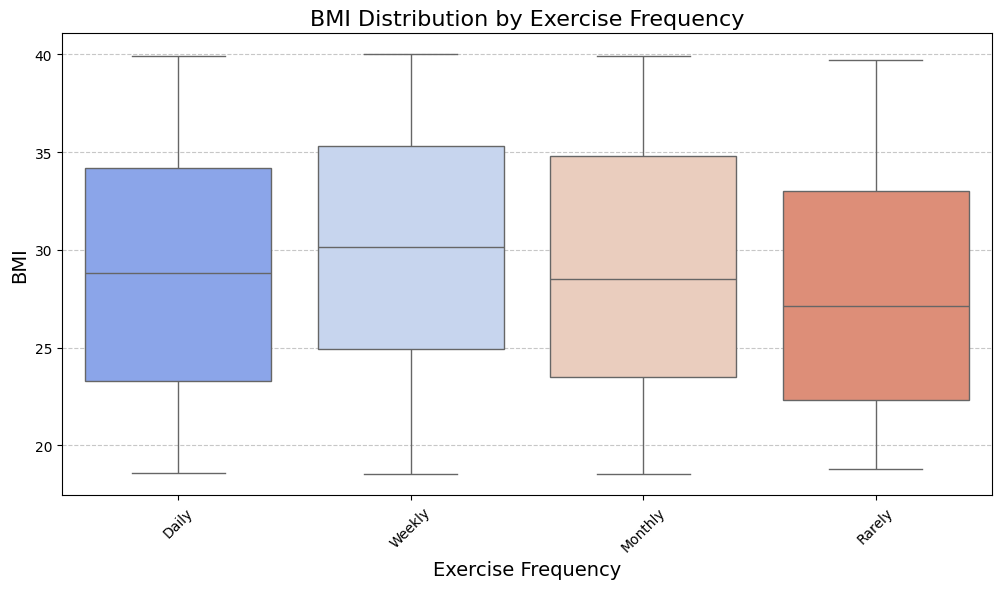

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Health_Trends_Data.csv'
data = pd.read_csv(file_path)

# Create a box plot for BMI by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Gender', y='BMI', palette='Set3')
plt.title('BMI Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Create a box plot for BMI by Exercise Frequency
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Exercise_Frequency', y='BMI', palette='coolwarm')
plt.title('BMI Distribution by Exercise Frequency', fontsize=16)
plt.xlabel('Exercise Frequency', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




---



## Submitting Your Work

Submit your work as usual.